In [1]:
# Deep Walk example
# https://dsgiitr.com/blogs/deepwalk/

In [2]:
import torch
import torch.nn as nn
import random
import networkx as nx
import matplotlib.pyplot as plt

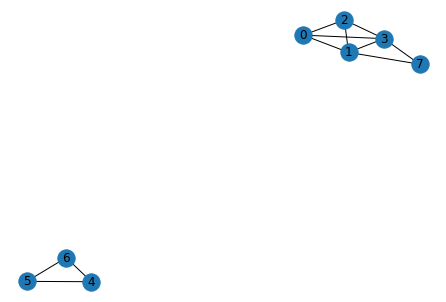

In [3]:
#  Graph
v=[0,1,2,3,4,5,6,7] # labels of available vertices (not really needed)
adj_list = [[1,2,3], [0,2,3], [0, 1, 3], [0, 1, 2], [5, 6], [4,6], [4, 5], [1, 3]]
size_vertex = len(adj_list)  # number of vertices

In [4]:
# Hyperparameters
w=3            # window size
d=2            # embedding size
y=200          # walks per vertex
t=6            # walk length 
lr=0.025       # learning rate

In [5]:
# Random Walk on the graph

def random_walk(node, t):
    walk = [node] # starting point / inital list of walk nodes
    
    for i in range(t-1):
        node = adj_list[node][random.randint(0, len(adj_list[node])-1)]
        walk.append(node)
        
    return walk

In [6]:
# SkipGram

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.phi = nn.Parameter(torch.rand((size_vertex, d), requires_grad=True))
        self.phi2 = nn.Parameter(torch.rand((d, size_vertex), requires_grad=True))
        
    def forward(self, one_hot):
        hidden = torch.matmul(one_hot, self.phi)
        out = torch.matmul(hidden, self.phi2)
        return out

model = Model()

def skip_gram(wvi, w):
    for j in range(len(wvi)):
        for k in range(max(0, j-w), min(j+w, len(wvi))):
            # generate 1-hot vector
            one_hot = torch.zeros(size_vertex)
            one_hot[wvi[j]] = 1
            
            out = model(one_hot)
            loss = torch.log(torch.sum(torch.exp(out))) - out[wvi[k]]
            loss.backward()
            
            for param in model.parameters():
                param.data.sub_(lr*param.grad)
                param.grad.data.zero_()

In [7]:
# training
for i in range(y):
    random.shuffle(v)
    for vi in v:
        wvi=random_walk(vi, t)
        skip_gram(wvi, w)

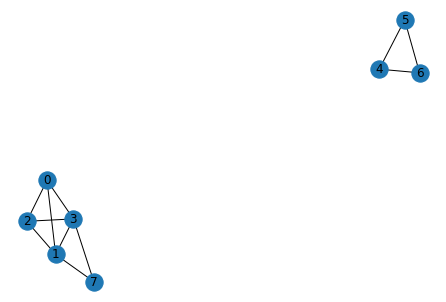

In [9]:
# Visualize
G = nx.Graph()
for i in range(size_vertex):
    G.add_node(i)
    for j in adj_list[i]:
        G.add_edge(i, j)
nx.draw(G, with_labels=True)

In [10]:
print(model.phi)

# we note that nodes 0,1,2,3,7 and 4,5,6 have a similar embedding

Parameter containing:
tensor([[ 1.2061, -0.9326],
        [ 1.0518, -0.2775],
        [ 1.1280, -0.3912],
        [ 1.0523, -0.9189],
        [-1.1144,  0.8999],
        [-0.5610,  1.3623],
        [-0.5839,  1.3451],
        [-0.1305, -0.9618]], requires_grad=True)
